**Day 2**: Performance metrics 📏 (***live in 1.49/1.50***)

# The two cells below load some helper functions used in the class

In [3]:
%matplotlib widget

In [4]:
# RUN THIS CELL TO LOAD GRAPHIC GENERATING FUNCTION

from ipywidgets import interact, IntSlider, FloatSlider
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

def sigmoid(x):
    return 1/(1+np.exp(-x))

def calculate_proba(x, threshold):
    data = np.linspace(-5, 5, num=11)
    true_class = [0,0,1, 0, 0, 1, 0, 1, 0, 1, 1]
    proba = sigmoid(data)
    predictions = [1 if p  >= threshold else 0 for p in proba]
    
    return (data, true_class, proba, predictions)
    

def calculate_matrix(predictions, true_class):
    cf_data = list(zip(predictions, true_class))
    tp = sum([1 if d==(1, 1) else 0 for d in cf_data])
    tn = sum([1 if d==(0, 0) else 0 for d in cf_data])
    fp = sum([1 if d==(1, 0) else 0 for d in cf_data])
    fn = sum([1 if d==(0, 1) else 0 for d in cf_data])
    
    #array = [[tp,fp],[tn,fn]]
    array = [[1,2],[3,4]]
    
    df_cm = pd.DataFrame(array, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
    
    annotations = pd.DataFrame([[f'TN\n{tn}',f'FP\n{fp}'],[f'FN\n{fn}',f'TP\n{tp}' ]])
    return df_cm, annotations

def calculate_metrics(predictions, true_class):
    precision = precision_score(true_class, predictions,zero_division=0)
    recall = recall_score(true_class, predictions)
    f1 = f1_score(true_class, predictions)
    accuracy = accuracy_score(true_class, predictions)
    return  precision, recall, accuracy, f1

def update_original(threshold = 0.5):
    data, true_class, proba, predictions = calculate_proba(x, threshold)
    df_cm = calculate_matrix(predictions, true_class)
    
    axes[0][1].clear()
    axes[1][0].clear()
    sns.heatmap(df_cm, annot=True, ax=axes[0][1],cbar=False, cmap='Purples')
    threshold_line.set_ydata()
    metrics = calculate_metrics(predictions, true_class)
    
    axes[1][0].barh(['Precision','Recall'],metrics)
    
    fig.canvas.draw_idle()
  
def create_plot(threshold = 0.5):
    
    fig, axes = plt.subplots(2,2, figsize=(10, 10))
    draw_plot(axes, threshold)
    
    return fig, axes

def separate_classes(data, true_class, predictions, proba):
    all_data = zip(data, true_class, predictions, proba)
    
    tp = []
    tn = []
    fp = []
    fn = []
    
    for d in all_data:
        if d[1] == d[2] and d[1] == 0:
            tn.append(d) 
        if d[1] == d[2] and d[1] == 1:
            tp.append(d) 
        if d[1] != d[2] and d[1] == 1:
            fn.append(d) 
        if d[1] != d[2] and d[1] == 0:
            fp.append(d) 
    
    return {'tp':tp, 'tn':tn, 'fp':fp, 'fn':fn}
        

def draw_plot(axes, threshold):
    x = np.linspace(-6, 6)
    data, true_class, proba, predictions = calculate_proba(x, threshold)
    label_font = {'size':'12', 'weight':'bold'}
    
    classes = separate_classes(data, true_class, predictions, proba)
    
    axes[0][0].axhspan(-.18, threshold, facecolor='dimgrey', alpha=0.2)
    axes[0][0].axhspan(threshold, 1.18, facecolor='powderblue', alpha=0.2)
    
    sigmoid_curve, = axes[0][0].plot(x, sigmoid(x))
    threshold_line, = axes[0][0].plot(x, np.ones(len(x))*threshold, c='r', linestyle='--')
    axes[0][0].set_xlim(-6,6)
    axes[0][0].set_ylim(-.18,1.18)
    axes[0][0].set_xlabel("Feature Space", fontdict=label_font)
    axes[0][0].set_ylabel("Probability", fontdict=label_font)
    
    axes[0][0].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    
    #axes[0][0] = axes[0][0].scatter(data, sigmoid(data), marker = symbols, s=400, c=true_class)
    
    colors = {'tp':'darkorchid', 'tn':'mediumpurple', 'fp':'lightcoral', 'fn':'lightsalmon'}
    
    for k, v in classes.items():
        if k == 'tp' or k == 'fn':
            m = 's'
            s = 300
        else:
            m = 'o'
            s = 400
        c = colors.get(k)
        
        values = np.array([d[0] for d in v])
        
        axes[0][0].scatter(values,sigmoid(values), marker=m,s=s, color=c)
    
    precision, recall, accuracy, f1 = calculate_metrics(predictions, true_class)
        
    axes[1][0].barh(['Precision','Recall'],[precision, recall], color=['darkgreen','coral'])
    axes[1][1].barh(['Accuracy','F1-Score'],[accuracy, f1], color=['mediumturquoise','plum'])
    axes[1][1].yaxis.set_label_position("right")
    axes[1][1].yaxis.tick_right()
    
    axes[1][1].annotate(  f'{f1:.02}', (f1/2, 1), size=12, weight='bold', color='white')
    axes[1][1].annotate(f'{accuracy:.01%}', (accuracy/2, 0),size=12, weight='bold', color='white')
    axes[1][0].annotate(  f'{precision:.01%}', (precision/2, 0), size=12, weight='bold', color='white')
    axes[1][0].annotate(f'{recall:.01%}', (recall/2, 1),size=12, weight='bold', color='white')
    
    axes[1][0].set_xlim(0,1)
    axes[1][1].set_xlim(0,1)
    df_cm, annotations = calculate_matrix(predictions, true_class)
    
    #create a discrete color mapping
    colors = ['darkorchid', 'lightcoral','lightsalmon','mediumpurple']
    levels = [0,1,2,3,4]
    cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors)

    cfm = sns.heatmap(df_cm,square=True, annot=annotations,fmt='', 
                      ax=axes[0][1],cbar=False, linewidth=.5, linecolor='k',
                      annot_kws={"size": 14,'weight':'bold'}, cmap=cmap)
    
    axes[0][1].set_xlabel('Predicted labels', fontdict=label_font);
    axes[0][1].set_ylabel('Actual labels', fontdict=label_font);
    
    return None
    

def update_plot(threshold = 0.5):
    
    for ax in axes.flatten():
        ax.clear()
    
    draw_plot(axes, threshold)
    
    fig.canvas.draw_idle()
    


def draw_roc_plot(select, auc, compare, ax):
    #plt.close()
    fpr= np.array([0,.03,.06,.11,.2,.3,.5,1])
    tpr =np.array([0,.3,.55,.8,.9,.95,.98,1])
    ratio = tpr[1:]/fpr[1:]
    text_y_pos = [0,0.01,.2, .35, .4, .45, .6, .5]
    
    if auc or compare:
        pts = np.array(list(zip(fpr,tpr))+[[1,0]])
        p = Polygon(pts, closed=False, color='gold', alpha=.2)
        ax.add_patch(p)
        ax.annotate(  f'AUC = 0.79', (.4, 0.93), size=20, weight='bold', color='maroon');
    else:
        ax.plot(np.ones(5)*fpr[select], np.linspace(0,tpr[select],5), color='gold',alpha=.2, linestyle='-', linewidth=40);
        ax.annotate(  f'TPR/FPR: {ratio[select-1]:.01f}', (fpr[select]-.01,text_y_pos[select]), size=16,rotation=90, weight='bold', color='maroon');
    
    if compare:
        fpr_b= np.array([0,.031,.09,.15,.23,.4,.6,1])
        tpr_b =np.array([0,.2,.5,.6,.71,.85,.91,1])
        pts = np.array(list(zip(fpr_b,tpr_b))+[[1,0]])
        p = Polygon(pts, closed=False, color='darkgreen', alpha=.5)
        ax.add_patch(p)
        ax.annotate(  f'AUC = 0.68', (.4, 0.75), size=20, weight='bold', color='white');
        ax.plot(fpr_b, tpr_b, color='b');
        ax.scatter(fpr_b, tpr_b, color='b', s=180);
        
        
        
    ax.plot(fpr, tpr, color='k');
    ax.scatter(fpr, tpr, color='k', s=180);
    ax.plot(np.linspace(0,1,5), np.linspace(0,1,5), color='r', linestyle='--');
    label_font = {'size':'12', 'weight':'bold'}
    ax.set_xlabel('False Positive Rate\n(1-Specificity)',fontdict=label_font);
    ax.set_ylabel('True Positive Rate\n(Sensitivity/Recall)',fontdict=label_font);
    ax.set_xlim(0, 1.02);
    ax.set_ylim(0, 1.02);
    return None  


def update_roc_plot(select, auc, compare, ax):
    ax.clear()
    
    draw_roc_plot(select, auc, compare, ax)
    
    fig.canvas.draw_idle()

  
def create_roc_plot(select=1, auc=False, compare=False):
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    draw_roc_plot(select=1, auc=False, compare=False,ax=ax)
    
    return fig, ax


# Hekper function to prepare the regression dataset

def split_and_scale(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)

    scaler = StandardScaler().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test
    

def prep_regression():
    data = pd.read_csv('Lecture_data/fish.csv')
    # Prepare X and y
    X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
    y = data['Weight']

    return split_and_scale(X, y)


# Hekper function to prepare the classification dataset

def prep_classification():
    data = pd.read_csv('Lecture_data/wines_binary.csv')
    
    X=data.drop(columns=['is_good_quality'])
    y=data.is_good_quality
    
    return split_and_scale(X, y)

<center><h1 style="color:maroon">Performance Metrics</h1>
<img src="https://drive.google.com/uc?id=12A_ZQ1a-C_Lo-VCkvU0TD-AEYMXZMT0U" style="width:1300px;">
    <h3><span style="color: #045F5F">Data Science & Machine Learning for Planet Earth Lecture Series</span></h3><h6><i> by Cédric M. John <span style="size:6pts">(2023)</span></i></h6></center>

## Plan for today's Lecture 🗓
* Algorithm of the Day: Logistic Regression and KNN
* Baseline score
* Regression Metrics
* Classification Metrics
* ROC-AUC

## Intended learning outcomes 👩‍🎓
* Confidently choose the right evaluation metric
* Compare different model performance
* Use different metrics in CrossValidation
* Use of KNN for classification and regression

# Regression Dataset
Today's dataset for regression: <a href="https://www.kaggle.com/aungpyaeap/fish-market">Kaggle fish market dataset</a>.
<img src="https://drive.google.com/uc?id=11nKFH6_UuaUexqoVQqEfSrKvDDdTQWVw" style="width:1300px;">

# Classification Dataset
**<span style="color:teal">Dataset for classification today:</span>** <a href="https://drive.google.com/uc?id=12A1GYnyQa3HJMKJnBNQHk4flA_l4_uA7">UCI Wine Dataset</a><br>
<img src="figures/wines.png" width="800"/>

# Algorithm of the Day: Classification with Logistic Regression
<br>

<center><img src="https://drive.google.com/uc?id=11rZhkAicPBeNHKositWRftquEN2KoYyx" style="width:900px;"><br>
 © Cédric John, 2023; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Algorithm of the Day.</center>

# How can we achieve classification with two classes?


<ul>
<li>Predict the <strong>probability</strong> of an outcome (0 or 1)<ul>
</ul>


<p><img src="https://drive.google.com/uc?id=12Ei3cF_bi7D6EjVnObwkwKXPsYwt28fM" width="1000"/></p>

# Fitting a linear model in probability space

<p><img src="https://drive.google.com/uc?id=12ALOmXt3TnVpGB0nlya1SjsdEc9XRNXC" width="1000"/></p>


<ul>
<li>OLS too gradual and sensitive to outliers</li>
</ul>



<ul>
    <li>Values are not capped</li>
</ul>


# The logistic function


<ul>
<li>We need a function that better represents probability<ul>
</ul>



<ul>
<li>Values capped between 0 and 1<ul>
</ul>



<ul>
<li>Less sensitive to outliers<ul>
</ul>


Logistic Function:

$$\sigma(X) = \frac{1}{1+e^{-X}}$$


<p><img src="https://drive.google.com/uc?id=11s48xEjlEU9vWEKI9bP7KpiTC5gZgZja" width="1000"/></p>

# Fitting a linear model

<p><img src="https://drive.google.com/uc?id=11wOdqlyC5-0CrhOLJo_dvyJx2T44j5Df" width="1800"/></p>

Clearly *NOT* a linear function!

# From probability to logit to achieve linearity

$P_{y=1}$ can be simplified as $(P)$ (probability of positive outcome).

By extension: $P_{y=0} = 1-P$

Odds = $\frac{P}{1-P}$ 

if $P=0.8$, $odds =\frac{P}{1-P}=\frac{0.8}{0.2} = 4$ 

logit ("log odds) = $ln(\frac{P}{1-P})$ 

<p><img src="https://drive.google.com/uc?id=11wPUNG-TMt7lIaPVu-7MdSgq6-t7hWpB" width="1800"/></p>

$$ln(\frac{P}{1-P})=\beta_0 + \beta_1 x1 + ... + \beta_n x_n$$

$$ln(\frac{P}{1-P})=\beta X$$

<p><img src="https://drive.google.com/uc?id=11j2QOk8eSGwAcnJxxs2pciFeuzmVefk8" width="1800"/></p>

Logistic Regression simply solves for $ln(\frac{P}{1-P})=\beta X$. We will see how on Wednesday.

Logistic Regression is a Linear Model -> Easy to interpret the parameters ($\beta$'s)

Relatively efficient: the most common classifiers in industry

# Logistic Regression in practice

In [5]:
X_train, X_test, y_train, y_test = prep_classification()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8627

# Algorithm of the Day: K-Nearest Neighbors (KNN)
<br>

<center><img src="https://drive.google.com/uc?id=126wqxbkAMx8HTs6QuFzznk-IV1zaBHv2" style="width:900px;"><br>
 © Cédric John, 2023; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Algorithm of the Day.</center>

K-Nearest Neighbors (KNN) is a non-linear, distance based model capable of solving both Regression and Classification tasks.<br><br>

* Looks at <code>K</code> closest samples to make a prediction

* Up to us to determine <code>K</code> (hyperparameter)

* No parameters are trained: instead, the **entire training dataset** is kept in memory and compared to for each prediction

### Calculate distance from sample
<img align="center" src="https://drive.google.com/uc?id=12-T333hJEesJmh8HrxJuidqY_Tx-AFK0" width="1200"/>
<a href=https://link.springer.com/chapter/10.1007/978-981-16-3342-3_10>Suddarao et al (2022)</a>


## KNN decisions
**Majority vote for classification:**
* For <code>k=6</code> Class A (4 vs 1)
* For <code>k=3</code> Class B (1 vs 2)
<img align="center" src="https://drive.google.com/uc?id=12-T333hJEesJmh8HrxJuidqY_Tx-AFK0" width="800"/><br>
<a href=https://link.springer.com/chapter/10.1007/978-981-16-3342-3_10>Suddarao et al (2022)</a>


**Average value for regression:**
* For <code>k=6</code> average 6 values
* For <code>k=3</code> average 3 values

<img align="center" src="https://drive.google.com/uc?id=12-T333hJEesJmh8HrxJuidqY_Tx-AFK0" width="800"/><br>
<a href=https://link.springer.com/chapter/10.1007/978-981-16-3342-3_10>Suddarao et al (2022)</a>

## Let's try it!

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
scores = accuracy_score(y_test,knn_model.predict(X_test))

scores


0.9147

## Choosing k
The optimal 𝑘 will vary from dataset to dataset.
* Lower k values, less observations to use to make a prediction, prone to overfitting
* Higher k values, signal can be diluted, prone to underfitting
* <code>sklearn</code> default is 5

# Baseline Score
<br>

<center><img src="https://drive.google.com/uc?id=11p2OJb3t0QUoI9tmSNdOz0XZddINPWDs" style="width:900px;"><br>
 © Cédric John, 2023; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a>
<br>Prompt: Algorithm of the Day.</center>

## What is a baseline score

Evaluation metrics are used to compare different iteration of a model, or different models against another.<br>

We start with a baseline score for the initial model utilizing very simple strategies for prediction:
* **Classification**: Predicts a random (balanced) or most frequent (imbalanced) class
* **Regression**: Predicts a central tendency measure e.g. mean, median or mode

## 💻 Regression baseline

In [9]:
X_train, X_test, y_train, y_test = prep_regression()

In [10]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy="mean") # Baseline

dummy_model.fit(X_train, y_train) # Calculate value for strategy
dummy_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.00069268305185477

In [11]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression().fit(X_train, y_train) # instantiate and fit model 

baseline_model.score(X_test, y_test) # Score model

0.8676045498644966

### 
Why use a dummy model?
* Scikit-learn objects can be chained within data pipelines
* Move rapidly through each step of pipeline construction
* Obstacles can be identifed downstream more quickly
* Actual model can be substituted later in the pipeline


# Regression Metrics
<br>

<center><img src="https://drive.google.com/uc?id=125RoaTVPbjEpqCf7_X9TNxS0WdOhM8CW" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: four cute little bears standing in a row and sorted from left to right from tallest to shortest, digital art.</center>

### Measuring a *distance* between y and $\hat{y}$


 <img src="https://drive.google.com/uc?id=1245GsCoc3Uu41TwsNdqxv0uPF_qCMfvi" style="width:800px;">
<a href=https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa>Grootendorf, 2021</a>


### Mean Squared Error (MSE)
$$\text{MSE} = {\frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat y_i)^2}$$

### Root Mean squared error (RMSE)
$$\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat y_i)^2 }$$


### Mean absolute error
* Less sensitive to outliers
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$$


### Max Error
$$ ME = \max_{i=1}^{n} |y_i - \hat{y_i}|$$


### Coefficient of determination $R^2$
$$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \overline{y})^2}$$

## Choosing the right regression metric

* 👉 Use MSE when you need to penalize large errors / sign of error not important

* 👉 Use RMSE when you want to penalize large errors, but see it in the unit of the target.

* 👉 Use MAE when all errors, large or small, have equal importance.

* 👉 Use Max Error when you want to limit the magnitude of the errors.

* 👉 Use $R^{2}$ when you want a general/comparable performance metric / units not required.

## 💻 Metrics in Sklearn

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

y_pred = baseline_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

rsquared = r2_score(y_test, y_pred)

max_error = max_error(y_test, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 16217.63
RMSE = 127.35
MAE = 95.58
R2 = 0.87
Max Error = 282.65


🚨There is no standardized value for Mean Square Error, Root Mean Square Error and Mean Abosulte Error. Scores will be relative to the magnitude of the units within the dataset


### 💻 Metrics during Cross-validation
* A metric of choice can be specified directly with algorithms.
* If <code>scoring</code> is not set, the model's default scoring metric is used.

In [13]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results)  # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.001673,0.001379,-336.080723,0.840449,-89.720506,-15567.300902
1,0.001030,0.001316,-423.829702,0.879118,-115.563939,-23011.831620
2,0.001095,0.001217,-396.512088,0.919412,-74.969312,-11763.339562
3,0.000790,0.001022,-316.379705,0.852831,-104.515769,-18943.822954
4,0.000754,0.001008,-234.342973,0.809597,-102.697382,-13985.709798


In [14]:

cv_results['test_r2'].mean()  # Cross validation results



0.8602813744337965

# Classification Metrics
<br>

<center><img src="https://drive.google.com/uc?id=11vFqBAgv12QOoRs7NohyB7_wvDcKVMEA" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: four different species of colorful flowers sorted by color" by Paul Kleh.</center>

In [15]:
X_train, X_test, y_train, y_test = prep_classification()

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 1., 0.])

In [18]:
y_prob = model.predict_proba(X_test) 
y_prob

array([[0.00901364, 0.99098636],
       [0.09197031, 0.90802969],
       [0.84573164, 0.15426836],
       ...,
       [0.06110844, 0.93889156],
       [0.01401553, 0.98598447],
       [0.90254191, 0.09745809]])

## Two possible correct outcomes for binary classification
 <img src="https://drive.google.com/uc?id=11hhMo0tbgG61H0umV_s1e9g5ZR18yjTF" style="width:720px">

* **True Negative (TN):** A member of the negative (<span style="color:red">0</span>) class correctly identified

* **True Positive (TP):** A member of the positive (<span style="color:blue">1</span>) class correctly identified

## Two possible Errors
 <img src="https://drive.google.com/uc?id=11yeWaxeTyyUnLmKtOC0uMBrT-rqjZHBN" style="width:720px">

* **False Negative (FN):** A member of the positive (<span style="color:blue">1</span>) class identified as negative (<span style="color:red">0</span>) (aka ***Type I Error***)

* **False Positive (FP):** A member of the negative (<span style="color:red">0</span>) class identified as positive (<span style="color:blue">1</span>) (aka ***Type II Error***)

### Confusion Matrix
<img src="https://drive.google.com/uc?id=11ow07RtJkcsa8egdkiUFxAHzoS6BzlRX" style="width:720px">

* **Correct Values** on one of the two diagonals, matrix can be larger for multiclass classifications

* **Often plotted with number of samples** or precentage of sample in each quadrant

* **Generally plotted as a heatmap** where the color represents the abundance in each quandrant (not here)

## Accuracy
Sum of the correct predictions divided by the sum of the overall number of predictions
$$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


<img src="https://drive.google.com/uc?id=11kx1FzJno0L8giQKlh5gtvHC2FMRjW4s" style="width:720px">
$\text{accuracy} = \frac{4 + 3}{4 + 3 + 2 + 1} = 0.7$


### Limitations of accuracy
<img src="https://drive.google.com/uc?id=11qvDN7jVoVt9rbEIllebh1jlQY2a3KzD" style="width:720px">


$accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{0 + 99}{0 + 99 + 1 + 0} = 0.99$

🚨Using accuracy alone can give overly confident scores, especially when dealing with imbalanced datasets🚨

## Balancing datasets
<img src="https://drive.google.com/uc?id=12-7bPfTCNNAwakeqFlEdnF-5nDrJ0E-I" width="1500"/>

### Why balancing?
* ML algorithms learn by example 
* Will tend to predict under represented class poorly 
* ~30:70 split for binary classification would be considered imbalanced 


### Oversampling or Undersampling 
Duplicating instances of the minority class or sampling down the majority class.
<img src="https://drive.google.com/uc?id=11r-ozAwbfoK8U7qgWw6ezmXMJtQ9abAP" style="width:1200px">
<a href="https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t1">Alencar, 2017</a>


* 🚨 Oversampling can cause data leakage between training and testing.

 
* Only use balancing techniques on the training set.

* We want to keep our test set as representative of real life as possible.

## Synthetic Minority Over-sampling TEchnique - SMOTE 
SMOTE is an oversampling algorithm that generates new minority instances from existing minority instances based on linear combinations of existing points.
<img src="https://drive.google.com/uc?id=11fjHaVEFamOmyzWlNohtLcMEYx3zRp0r" style="width=1200px">
<a href="https://iq.opengenus.org/smote-for-imbalanced-dataset/">Source: Maheshwari / OpenGenus</a>


### 👷 How SMOTE works:
**1.** Using KNN find <span style="color:teal">***k-nearest neighbors***</span> of minority sample

**2.** Generate **<span style="color:teal">*m* synthetic samples</span>** at random on the hyperplane defined by the *k-neighbors*

## Recall
Measures the ability of the model to detect occurrences of a class.
$$recall = \frac{TP}{TP + FN}$$


<img src="https://drive.google.com/uc?id=11kx1FzJno0L8giQKlh5gtvHC2FMRjW4s" style="width:720px">
$\text{recall=}\frac{4}{4 + 1}=0.8$<br>

### Limitations of recall

<img src="https://drive.google.com/uc?id=11z8D8vTujs0SidCByDSbIhmEYi8R8ysk" style="width:720px">

$recall = \frac{TP}{TP + FN} = \frac{27}{27 + 3} = 0.89$

* A lot of false positive acceptable for task such as cancer identification
* But could also be terrible for a smoke alarm


## Precision
Measures the ability of a model to correctly identify TPs.
$$precision = \frac{TP}{TP + FP}$$

<img src="https://drive.google.com/uc?id=11kx1FzJno0L8giQKlh5gtvHC2FMRjW4s" style="width:720px">
$\text{precision}=\frac{4}{4 + 2} = 0.67$<br>

### Limitations of precision

<img src="https://drive.google.com/uc?id=12BRkkKnctGOPO3j4juoFQyNbfQxjYMYT" style="width:720px">

$\text{precision} = \frac{TP}{TP + FP} = \frac{356}{356 + 44} = 0.89$

$\text{recall} = \frac{TP}{TP + FN} = \frac{356}{356 + 900} = 0.28$

### Other metrics similar to precision and recall:

* Recall = <span style="color:blue">True positive rate</span> = sensitivity = $\frac{TP}{TP + FN}$
* Specificity = $\frac{TN}{FP + TN}$<br>
* <span style="color:red">False positive rate</span> = (1-specificity) = $\frac{FP}{FP + TN}$<br>

## $F_1-score$
A combination of precision and recall into a single metric.

$$F_1=2 \times \frac{precision \times recall}{precision + recall}$$

* Also known as the harmonic mean of precision and recall
* It will be influenced more by the lower of the two values

<img src="https://drive.google.com/uc?id=11kx1FzJno0L8giQKlh5gtvHC2FMRjW4s" style="width:720px">
$\text{F}_1\text{ score}=2 ·\frac{0.67 \times 0.8}{0.67 + 0.8} = 0.73$<br>


## What each metric gives you

* 👉 Use **Accuracy** when you have balanced classes and predicting each class is important

* 👉 Use **Recall** when it is important to identify as many occurences of a class as possible.

* 👉 Use **Precision** when it is important to correctly identify the positive class.

* 👉 Use **$F_{1}$** when you want a generic metric to compare across models and dataset

## 💻 Classification metrics in Sklearn

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', round(accuracy_score(y_test, y_pred), 2)) # Accuracy

print('Precision =', round(precision_score(y_test, y_pred), 2)) # Precision

print('Recall =', round(recall_score(y_test, y_pred), 2)) # Recall

print('F1 score =', round(f1_score(y_test, y_pred), 2)) # F1 score


Accuracy = 0.86
Precision = 0.88
Recall = 0.84
F1 score = 0.86


# Decision Threshold (for binary classifiers)
<br>

<center><img src="https://drive.google.com/uc?id=11pFyOGIt21V4ZWtd9uINMI4jGOq5-wYN" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: A 35 mm photo of a Greek door step painted in vivid blue opening up in a white wall and showing the sea on the horizon.</center>

## 🖥 <code>precision_recall_curve</code>
The <code>precision_recall_curve</code> let us compare precision and recall for **binary classifiers** across a variety of thresholds.<br>
We can use this to find a threshold that guarantees a score for one metric whilst maintaining a minimum score for the other.


## The Precision-Recall Tradeoff
* In **binary classification**: inverse relationship between precision and recall
* Typically, we will trade one off against the other

interactive(children=(FloatSlider(value=0.5, description='threshold', max=0.99, min=0.01, step=0.01), Output()…

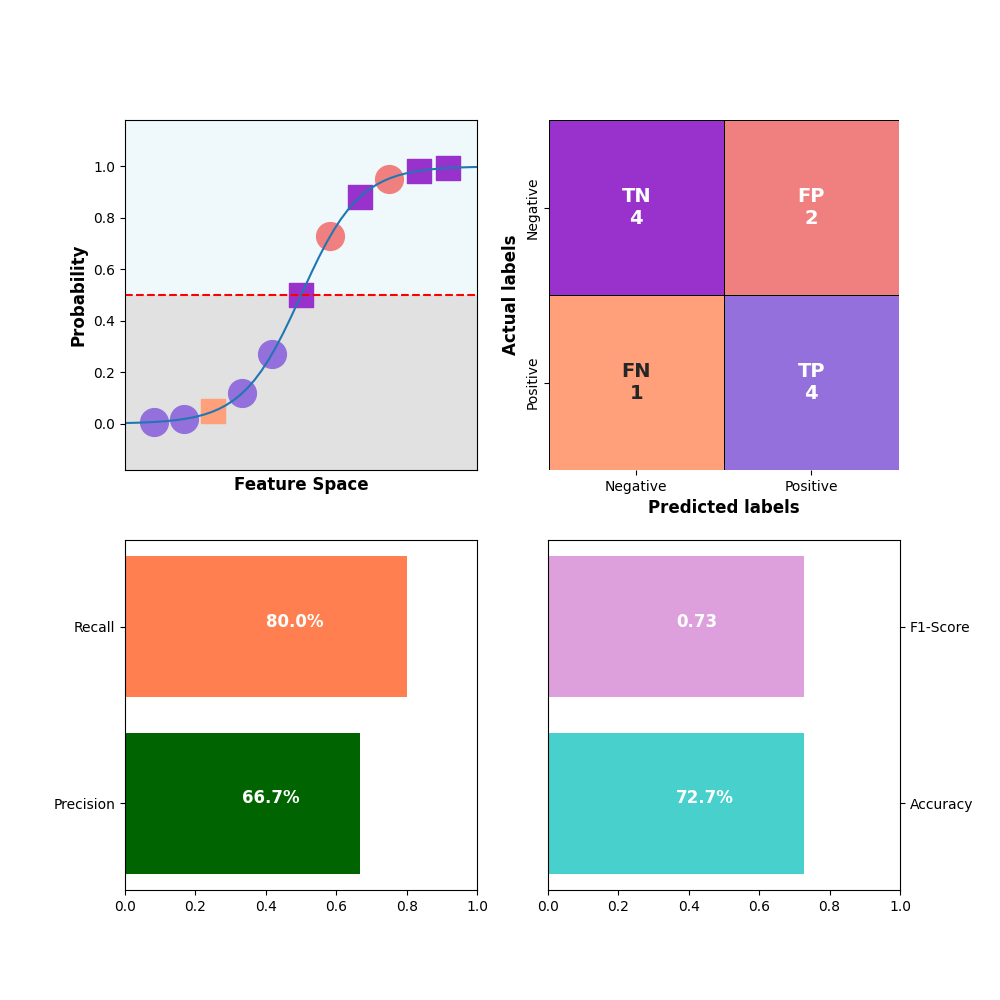

In [20]:
fig, axes = create_plot();
@interact(threshold=FloatSlider(min=0.01,max=0.99,step=.01,value=.5))
def plot(threshold):
    update_plot(threshold)

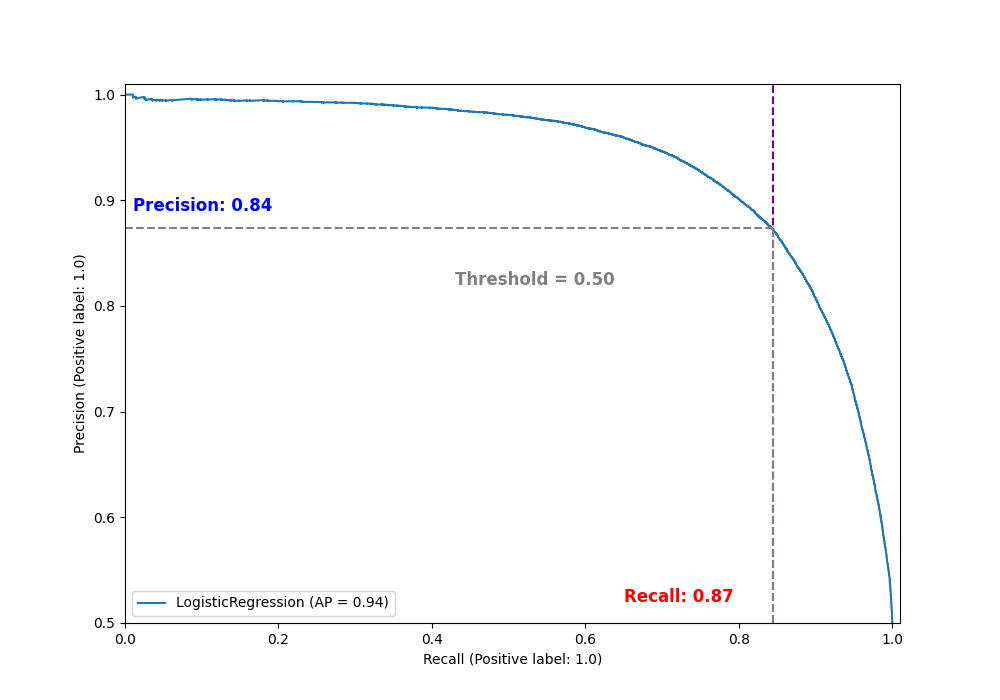

In [21]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

fig, ax = plt.subplots(1,1, figsize=(10,7))

PrecisionRecallDisplay.from_estimator(model, X_train, y_train, ax=ax);
ax.set_ylim(0.5, 1.01)
ax.set_xlim(0, 1.01)
ax.plot(np.ones(2)*0.8445266468790148,np.linspace(0.5,1.1,2), color='purple', linestyle='--')
ax.plot(np.ones(2)*0.8445266468790148,np.linspace(0.5,0.8741316459178761,2), color='grey', linestyle='--')
ax.plot(np.linspace(0,0.8445266468790148,2),np.ones(2)*0.8741316459178761, color='grey', linestyle='--');
ax.annotate(  f'Threshold = 0.50', (.43,.82), size=12, weight='bold', color='grey')
ax.annotate(  f'Precision: 0.84', (.01,.89), size=12, weight='bold', color='blue')
ax.annotate(  f'Recall: 0.87', (.65,.52), size=12, weight='bold', color='red');

## 🍷 Adjusting the Threshold
What if I have specific requirements for my wine quality? For instance, let's say that I need a classifier that can give me at least a 90% precision on the win quality, with the maximum recall possible.

We can use the <code>precision_recall_curve</code> tool to identify the best threshold for our requirements.

In [22]:
precision, recall, threshold = precision_recall_curve(y_test, y_prob[:,1])

In [23]:
prc_df = pd.DataFrame(precision,columns=['Precision'])
prc_df['Recall'] = recall
prc_df

,Precision,Recall
0,0.500733,1.000000
1,0.500750,1.000000
2,0.500767,1.000000
3,0.500783,1.000000
4,0.500800,1.000000
...,...,...
29996,1.000000,0.000266
29997,1.000000,0.000200
29998,1.000000,0.000133
29999,1.000000,0.000067


In [24]:
prc_df[prc_df['Precision']>=.9].sort_values('Recall',ascending=False)

,Precision,Recall
16448,0.900015,0.811942
16449,0.900007,0.811876
16450,0.900000,0.811809
16453,0.900052,0.811676
16454,0.900044,0.811610
...,...,...
29996,1.000000,0.000266
29997,1.000000,0.000200
29998,1.000000,0.000133
29999,1.000000,0.000067


In [25]:
th_index = prc_df[prc_df['Precision']>=.9].sort_values('Recall',ascending=False).index[0]
th_index

16448

In [26]:
threshold[th_index]

0.5704136606288632

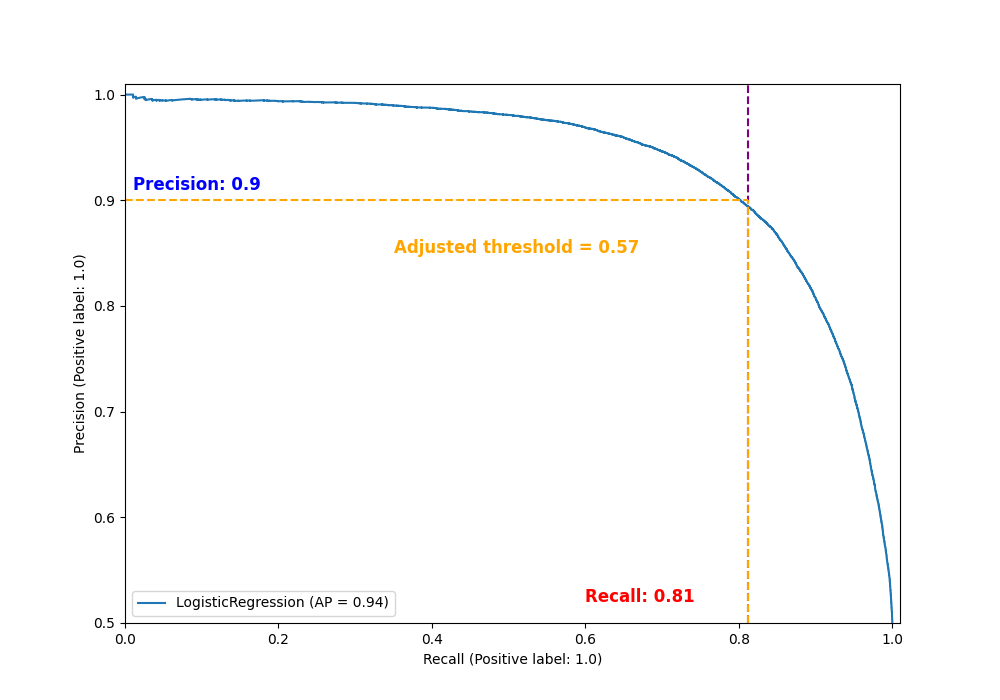

In [27]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

fig, ax = plt.subplots(1,1, figsize=(10,7))

PrecisionRecallDisplay.from_estimator(model, X_train, y_train, ax=ax);
ax.plot(np.ones(2)*recall[th_index],np.linspace(0.5,1.1,2), color='purple', linestyle='--')
ax.plot(np.ones(2)*recall[th_index],np.linspace(0.5,precision[th_index],2), color='orange', linestyle='--')
ax.plot(np.linspace(0,recall[th_index],2),np.ones(2)*precision[th_index], color='orange', linestyle='--');
ax.annotate(  f'Adjusted threshold = {threshold[th_index]:.02}', (.35,.85), size=12, weight='bold', color='orange')
ax.annotate(  f'Precision: 0.9', (.01,.91), size=12, weight='bold', color='blue')
ax.annotate(  f'Recall: 0.81', (.6,.52), size=12, weight='bold', color='red')
ax.set_ylim(0.5, 1.01)
ax.set_xlim(0, 1.01);

## Receiver-Operator Curve Area Under the Curve (ROC-AUC)

interactive(children=(IntSlider(value=1, description='x', max=5, min=1), Checkbox(value=False, description='au…

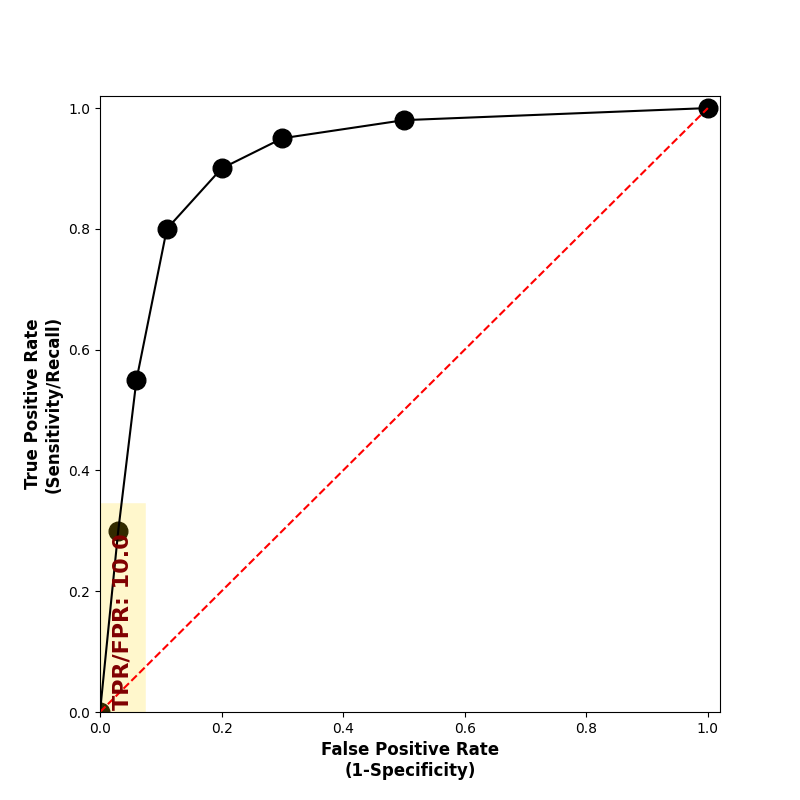

In [28]:
fig, ax = create_roc_plot()

@interact(x=IntSlider(min=1,max=5, values=1), auc=False, compare=False)
def plot(x, auc, compare):
    update_roc_plot(select=x, auc=auc, compare=compare, ax=ax);

## 🍷  ROC-AUC for our wine classifier

* Unlike F1, recall, precision and accuracy- AUC is not dependent on a threshold chosen
* This makes it a great metric for measuring a models general performance 💪

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.8627286958252834

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

In [31]:
auc_score_knn = roc_auc_score(y_test, y_pred_knn)
auc_score_knn

0.9147069054139655

In [32]:
# Compute AUC score
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob[:,1], drop_intermediate=False)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn[:,1], drop_intermediate=False)

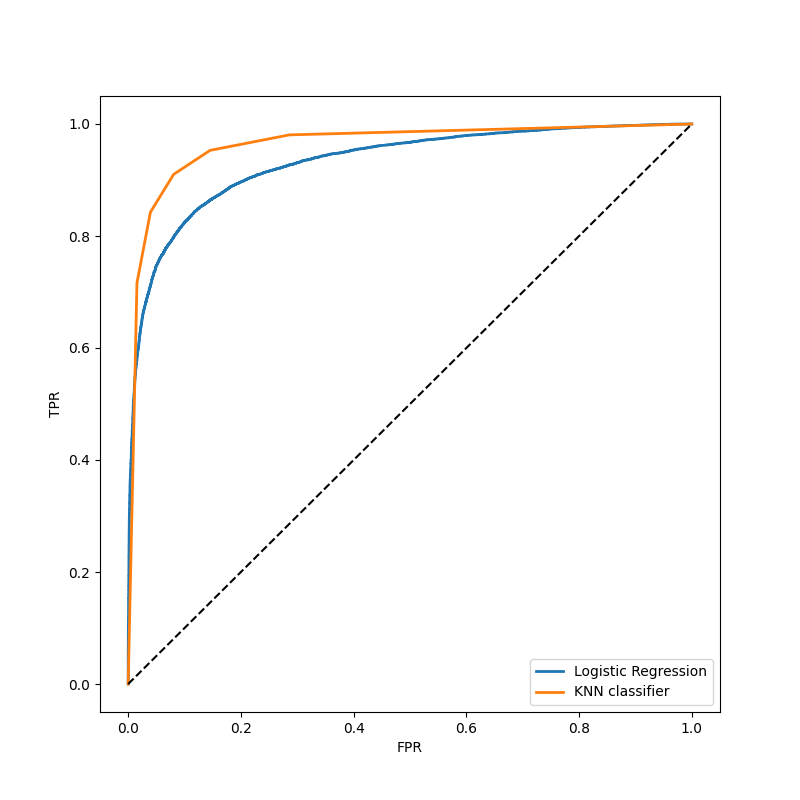

In [33]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.plot(fpr_lr, tpr_lr, label='Logistic Regression', linewidth=2)
ax.plot(fpr_knn, tpr_knn, label='KNN classifier', linewidth=2)
ax.plot(np.linspace(0,1,5), np.linspace(0,1,5), color='k',linestyle='--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend();

# Suggested Resources

## 📺 Videos 
#### Short videos from my Undegraduate Machine Learning Classes:

* 📼 <a href="https://youtu.be/wZc0N3TOX_Y?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Types of Machine Learning</a>
* 📼 <a href="https://youtu.be/Ij9s_eSC5C4?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Performance Metrics in Classification</a>

## 📚 Further Reading 
* 📖 <a href="https://pubs.acs.org/doi/10.1021/acs.jcim.1c00160#">GHOST: Adjusting the Decision Threshold to Handle Imbalanced Data in Machine Learning</a> by Esposito et al., 2021
* 📖 <a href="https://towardsdatascience.com/how-to-add-decision-threshold-tuning-to-your-end-to-end-ml-pipelines-7077b82b71a">How to add Decision Threshold tuning to your end to end ML pipelines</a> by Jerome Kafrouni, 2021
* 📖 <a  href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc">The ROC Curve</a> by Google Developers
* 📖 <a href="https://www.mygreatlearning.com/blog/knn-algorithm-introduction/">A good introduction to KNN</a> by Marina Chatterjee

## 💻🐍 Time to Code ! 